In [146]:
import sys
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import os
import math
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import precision_recall_curve, accuracy_score, precision_score, f1_score,mean_squared_error,plot_confusion_matrix,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn import linear_model


from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

import statsmodels.api as sm

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import he_normal

In [147]:
def R_oss(y_test,y_pred):
    
    sum_numerator = 0
    sum_denom = 0
    
        
    for i in range(len(y_pred)):
        sum_numerator += (y_test[i]-y_pred[i])**2
        sum_denom += (y_test[i] - y_test.mean())**2
    R_Oss_GKX = 1 - ((sum_numerator)/(sum(y_test**2)))
    R_Oss = 1 - ((sum_numerator)/(sum_denom))
    
    print("Mean Squared Error is", mean_squared_error(y_test, y_pred))
    print("R_Oos is",R_Oss*100,"%")
    print("R_Oos GKX is",R_Oss_GKX*100,"%")
    
def train_test(X,y,train_start,train_end,test_end):
    
    train = (train_start <= X.index) & (X.index < train_end)
    test = (train_end <= X.index) & (X.index < test_end)

    X_train = X[train]
    y_train = y[train].values.ravel()
    X_test = X[test]
    y_test = y[test].values.ravel()
    
    return X_train,y_train,X_test,y_test

### Predicting stock from News using Decession Trees

In [148]:
def decision_tree_nlp(X,y,train_start,train_end,test_end):
    
    data =train_test(X,y,train_start,train_end,test_end)
   
    clf = tree.DecisionTreeRegressor()
    clf.fit(data[0],data[1])
    y_pred = clf.predict(data[2])

    pred_cum = []
    real_cum = []
    
    for i in range(len(y_pred)):
        pred_cum.append(sum(y_pred[:i])+1)
        real_cum.append(sum(data[3][:i])+1)
    
    R_oss(data[3],y_pred)
    
    plt.figure()
    plt.title('Cummulative returns')
    plt.plot(pred_cum,label = 'Predictions')
    plt.plot(real_cum,label = 'Actual')
    plt.legend()
    plt.show()
    
    return clf

### Predicting stock from News using Random Forest

In [149]:
def random_forest_nlp(X,y,train_start,train_end,test_end):
    
    data =train_test(X,y,train_start,train_end,test_end)

    regr = RandomForestRegressor(max_depth=None, random_state=0)
    regr.fit(data[0],data[1])
    y_pred = regr.predict(data[2]).ravel()

    pred_cum = []
    real_cum = []
    
    for i in range(len(y_pred)):
        pred_cum.append(sum(y_pred[:i])+1)
        real_cum.append(sum(data[3][:i])+1)
    
    R_oss(data[3],y_pred)
    
    plt.figure()
    plt.title('Cummulative returns')
    plt.plot(pred_cum,label = 'Predictions')
    plt.plot(real_cum,label = 'Actual')
    plt.legend()
    plt.show()
    
    return regr

In [150]:
def random_forest_claasifier_nlp(X,y,train_start,train_end,test_end):
    
    data =train_test(X,y,train_start,train_end,test_end)

    clf = RandomForestClassifier(max_depth=2, random_state=0)
    clf.fit(data[0], data[1])
    y_pred = clf.predict(data[2])
    precision = precision_score(data[3], y_pred)
    conf_matrix = confusion_matrix(data[3], y_pred)
    
    print('Precision is: ',precision*100,'%')
    print(conf_matrix)
    return clf

In [151]:

def lasso_nlp(X,y,train_start,train_end,test_end,alpha=0.1):
    data =train_test(X,y,train_start,train_end,test_end)
    
    clf = linear_model.Lasso(alpha)
    clf.fit(data[0],data[1])
    y_pred = clf.predict(data[2])
    
    pred_cum = []
    real_cum = []
    
    for i in range(len(y_pred)):
        pred_cum.append(sum(y_pred[:i])+1)
        real_cum.append(sum(data[3][:i])+1)
    
    R_oss(data[3],y_pred)
    
    plt.figure()
    plt.title('Cummulative returns')
    plt.plot(pred_cum,label = 'Predictions')
    plt.plot(real_cum,label = 'Actual')
    plt.legend()
    plt.show()
    
    return clf
    


Mean Squared Error is 0.0006797560761026732
R_Oos is -249.5004635574432 %
R_Oos GKX is -249.22369478395555 %


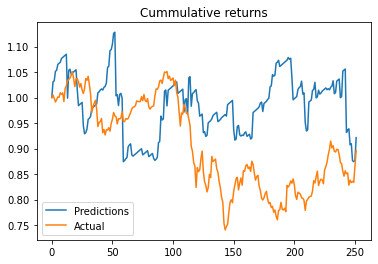

Mean Squared Error is 0.0004650134818447983
R_Oos is -139.08933392258422 %
R_Oos GKX is -138.89999951933282 %


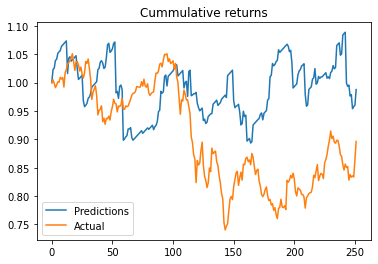

RandomForestRegressor(random_state=0)

In [152]:
Msft_final = pd.read_csv('Benchmark_Msft.csv', delimiter=',')
Msft_final.dataframeName = 'Benchmark_Msft.csv'
Msft_final.set_index('Date',inplace=True)

X_Msft,y_Msft = Msft_final[['compound']],Msft_final[['returns']]

decision_tree_nlp(X_Msft,y_Msft,'2008-12-04','2009-12-04','2010-12-04')
random_forest_nlp(X_Msft,y_Msft,'2008-12-04','2009-12-04','2010-12-04')

Mean Squared Error is 0.0007520696355762136
R_Oos is -149.66364316776105 %
R_Oos GKX is -146.69574979605034 %


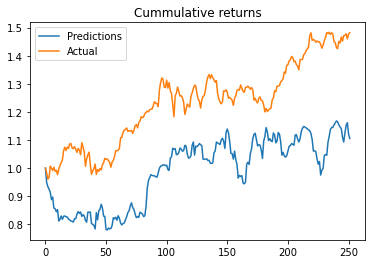

Mean Squared Error is 0.0005111633485603583
R_Oos is -69.69027576500038 %
R_Oos GKX is -67.67307118408226 %


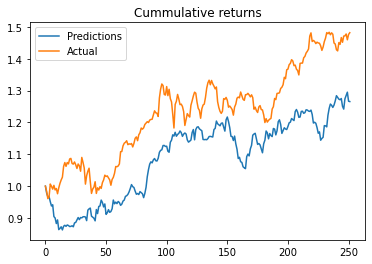

RandomForestRegressor(random_state=0)

In [153]:
Appl_final = pd.read_csv('Benchmark_Apple.csv', delimiter=',')
Appl_final.dataframeName = 'Benchmark_Apple.csv'
Appl_final.set_index('Date',inplace=True)

X_Appl,y_Appl = Appl_final[['compound']],Appl_final[['returns']]

decision_tree_nlp(X_Appl,y_Appl,'2008-12-04','2009-12-04','2010-12-04')
random_forest_nlp(X_Appl,y_Appl,'2008-12-04','2009-12-04','2010-12-04')

In [154]:
Dataset_final = pd.read_csv('Dataset_final.csv')
Dataset_final.dataframeName = 'Dataset_final.csv'
Dataset_final.set_index('Date',inplace=True)
Dataset_final

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,...,Top24,Top25,Apple compound,Msft compound,DJI returns,S&P 500 returns,Apple returns,Apple Label,Microsoft returns,Microsoft Label
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-08,-0.5994,0.0000,-0.3612,-0.7089,-0.9260,0.0000,-0.2732,0.2144,-0.5719,-0.5994,...,-0.8519,0.4019,-0.9136,0.0000,0.026151,0.023612,0.035907,1,0.026659,1
2008-08-11,0.8156,-0.3182,0.4404,-0.1965,0.0000,-0.4939,-0.5106,-0.0772,-0.6688,-0.3400,...,-0.1832,0.0000,0.8948,0.0000,0.004085,0.006919,0.023375,1,-0.008210,0
2008-08-12,0.0258,0.0000,-0.7845,-0.6124,0.0000,-0.6908,-0.5994,-0.5994,0.3400,-0.7650,...,0.0000,0.0000,0.1531,0.2023,-0.011943,-0.012124,0.018100,1,0.007854,1
2008-08-13,-0.7184,-0.8074,-0.6369,-0.1280,-0.5106,0.0000,0.2960,0.0000,0.3612,0.0000,...,-0.4215,-0.3400,0.0000,-0.8074,-0.009451,-0.002920,0.014437,1,-0.007496,0
2008-08-14,0.2023,0.0000,0.6808,-0.8689,-0.6124,-0.6369,0.7177,-0.4404,-0.6808,-0.3400,...,-0.6908,0.7096,0.7717,0.0000,0.007168,0.005507,0.000112,1,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-27,-0.2263,0.2732,-0.6369,-0.1027,0.6369,-0.5423,-0.7096,-0.5719,-0.5859,0.0000,...,0.2500,0.1280,0.1210,0.8360,-0.015084,-0.018262,-0.014668,0,-0.028498,0
2016-06-28,0.8316,-0.4588,0.4939,0.3182,-0.7717,-0.7351,0.0000,0.2960,-0.2732,0.0000,...,-0.7184,-0.9349,-0.2091,0.0000,0.015600,0.017614,0.016700,1,0.020640,1
2016-06-29,0.0000,-0.6808,0.7783,-0.7430,-0.4404,0.0000,-0.8020,0.2960,0.5719,-0.1779,...,0.0000,0.0000,-0.2732,-0.2732,0.016235,0.016889,0.008618,1,0.022005,1


Mean Squared Error is 0.00020324527568520438
R_Oos is 32.52891277105444 %
R_Oos GKX is 33.33097986431699 %


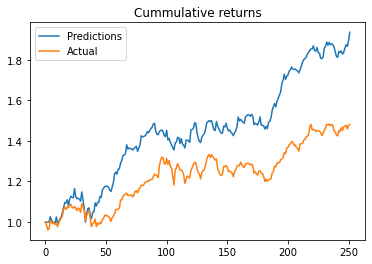

Mean Squared Error is 0.00011218965601578837
R_Oos is 70.20574914161217 %
R_Oos GKX is 70.63829352736884 %


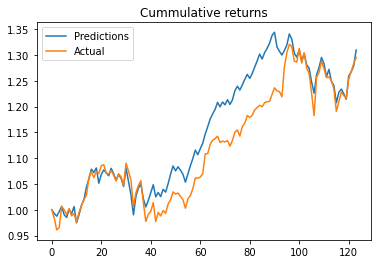

RandomForestRegressor(random_state=0)

In [155]:
X_App,y_App = Dataset_final.drop(['Apple returns','Top6','Top7','Top8','Top9','Top10','Top11','Top12','Top13','Top14',
                                  'Top15','Top16','Top17','Top18','Top19','Top20',
                                  'Top21','Top22','Top23','Top24','Top25'],axis=1),Dataset_final['Apple returns']

decision_tree_nlp(X_App,y_App,'2008-12-04','2009-12-04','2010-12-04')
random_forest_nlp(X_App,y_App,'2008-12-04','2009-12-04','2010-06-04')

Mean Squared Error is 0.00018387031305229954
R_Oos is -45.3032684950456 %
R_Oos GKX is -42.77453325153557 %


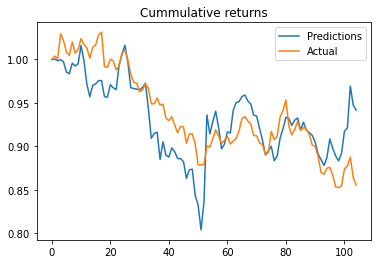

Mean Squared Error is 6.889834193713046e-05
R_Oos is 45.553177611076414 %
R_Oos GKX is 46.50072407784221 %


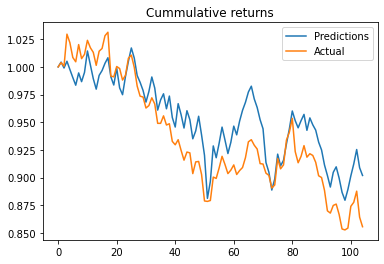

RandomForestRegressor(random_state=0)

In [156]:
X_Ms,y_Ms = Dataset_final.drop(['Microsoft returns','Top6','Top7','Top8','Top9'
                                ,'Top10','Top11','Top12','Top13','Top14','Top15',
                                'Top16','Top17','Top18','Top19','Top20','Top21','Top22',
                                'Top23','Top24','Top25'],axis=1),Dataset_final['Microsoft returns']

decision_tree_nlp(X_Ms,y_Ms,'2008-08-08','2011-01-04','2011-06-04')
random_forest_nlp(X_Ms,y_Ms,'2008-08-08','2011-01-04','2011-06-04')

In [157]:
X_class_apple = Dataset_final.drop(['Apple Label','Apple returns','Microsoft returns'
                                     ],axis=1)#,'Top6','Top7','Top8','Top9',
                                     #'Top10','Top11','Top12','Top13','Top14','Top15','Top16',
                                     #'Top17','Top18','Top19','Top20','Top21','Top22','Top23','Top24','Top25'],axis=1)

y_class_apple = Dataset_final['Apple Label']

In [158]:
#Stock dropping
random_forest_claasifier_nlp(X_class_apple,y_class_apple,'2010-08-08','2011-01-04','2011-03-04')
#Stock icreasing
random_forest_claasifier_nlp(X_class_apple,y_class_apple,'2008-12-04','2009-12-04','2010-12-04')

Precision is:  67.64705882352942 %
[[ 4 11]
 [ 3 23]]
Precision is:  73.54838709677419 %
[[ 69  41]
 [ 28 114]]


RandomForestClassifier(max_depth=2, random_state=0)

In [159]:
X_class_msft = Dataset_final.drop(['Apple returns','Microsoft returns','Microsoft Label'],axis=1)
                                     #'Top6','Top7','Top8','Top9',
                                     #'Top10','Top11','Top12','Top13','Top14','Top15','Top16',
                                     #'Top17','Top18','Top19','Top20','Top21','Top22','Top23','Top24','Top25'],axis=1)

y_class_msft = Dataset_final['Microsoft Label']

In [160]:
random_forest_claasifier_nlp(X_class_msft,y_class_msft,'2010-08-08','2011-01-04','2011-03-04')
random_forest_claasifier_nlp(X_class_msft,y_class_msft,'2008-12-04','2009-12-04','2010-12-04')

Precision is:  62.5 %
[[13  9]
 [ 4 15]]
Precision is:  63.0 %
[[ 45  74]
 [  7 126]]


RandomForestClassifier(max_depth=2, random_state=0)